In [2]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/house-prices/train.csv
/kaggle/input/house-prices/test.csv


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
df_train = pd.read_csv('/kaggle/input/house-prices/train.csv')
df_test = pd.read_csv('/kaggle/input/house-prices/test.csv')

In [5]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [6]:
df_train.tail()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125
1459,1460,20,RL,75.0,9937,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2008,WD,Normal,147500


In [7]:
df_train.isnull().sum()[df_train.isnull().sum() > 0]

LotFrontage      259
Alley           1369
MasVnrType       872
MasVnrArea         8
BsmtQual          37
BsmtCond          37
BsmtExposure      38
BsmtFinType1      37
BsmtFinType2      38
Electrical         1
FireplaceQu      690
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
PoolQC          1453
Fence           1179
MiscFeature     1406
dtype: int64

In [9]:
df_test.isnull().sum()[df_test.isnull().sum() > 0]

MSZoning           4
LotFrontage      227
Alley           1352
Utilities          2
Exterior1st        1
Exterior2nd        1
MasVnrType       894
MasVnrArea        15
BsmtQual          44
BsmtCond          45
BsmtExposure      44
BsmtFinType1      42
BsmtFinSF1         1
BsmtFinType2      42
BsmtFinSF2         1
BsmtUnfSF          1
TotalBsmtSF        1
BsmtFullBath       2
BsmtHalfBath       2
KitchenQual        1
Functional         2
FireplaceQu      730
GarageType        76
GarageYrBlt       78
GarageFinish      78
GarageCars         1
GarageArea         1
GarageQual        78
GarageCond        78
PoolQC          1456
Fence           1169
MiscFeature     1408
SaleType           1
dtype: int64

In [10]:
def clean_data(df):
    df = df.copy()  # don't modify original dataframe
    
    # LotFrontage → median by Neighborhood
    df['LotFrontage'] = df.groupby('Neighborhood')['LotFrontage'].transform(
        lambda x: x.fillna(x.median())
    )
    
    # Fill categorical missing with 'None'
    for col in [
        'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure',
        'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType',
        'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC',
        'Fence', 'MiscFeature', 'Utilities', 'Functional', 'SaleType'
    ]:
        if col in df.columns:
            df[col] = df[col].fillna('None')
    
    # Fill numerical missing with 0
    for col in [
        'MasVnrArea', 'GarageYrBlt', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', 'BsmtFullBath', 'BsmtHalfBath',
        'GarageCars', 'GarageArea'
    ]:
        if col in df.columns:
            df[col] = df[col].fillna(0)
    
    # Fill mode-based missing values
    mode_fill = {
        'Electrical': 'mode',
        'KitchenQual': 'mode',
        'Exterior1st': 'mode',
        'Exterior2nd': 'mode',
        'MSZoning': 'mode'
    }
    
    for col, method in mode_fill.items():
        if col in df.columns:
            df[col] = df[col].fillna(df[col].mode()[0])
    
    return df


In [11]:
df_train = clean_data(df_train)
df_test = clean_data(df_test)

# Verify no missing values:
print(df_train.isnull().sum()[df_train.isnull().sum() > 0])
print(df_test.isnull().sum()[df_test.isnull().sum() > 0])


Series([], dtype: int64)
Series([], dtype: int64)



Visualizing: Training Set


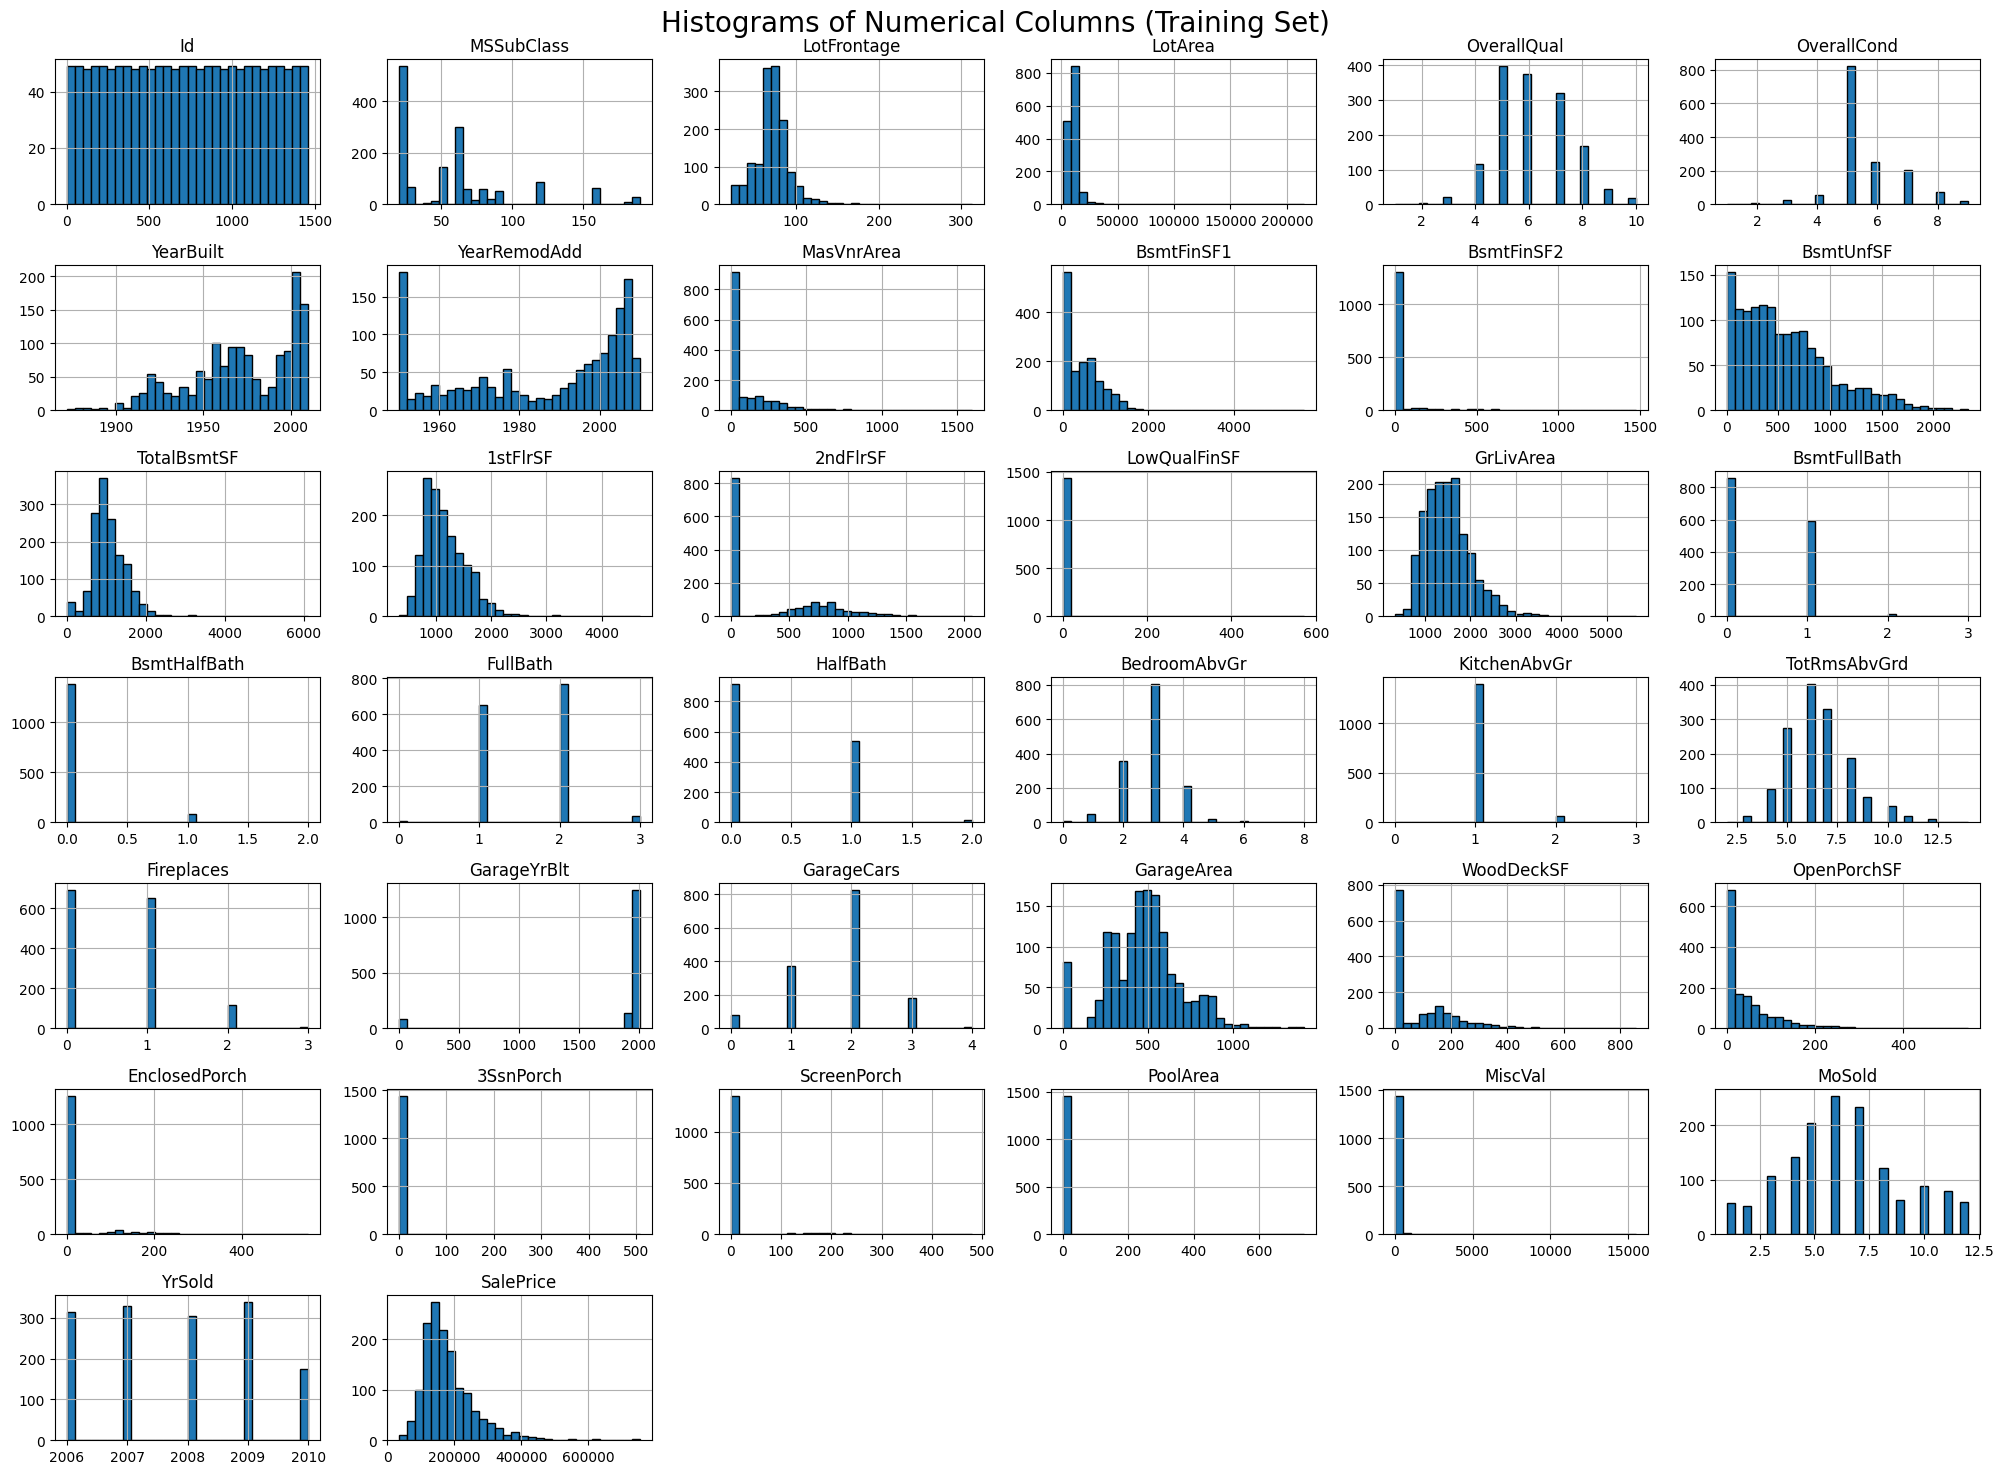

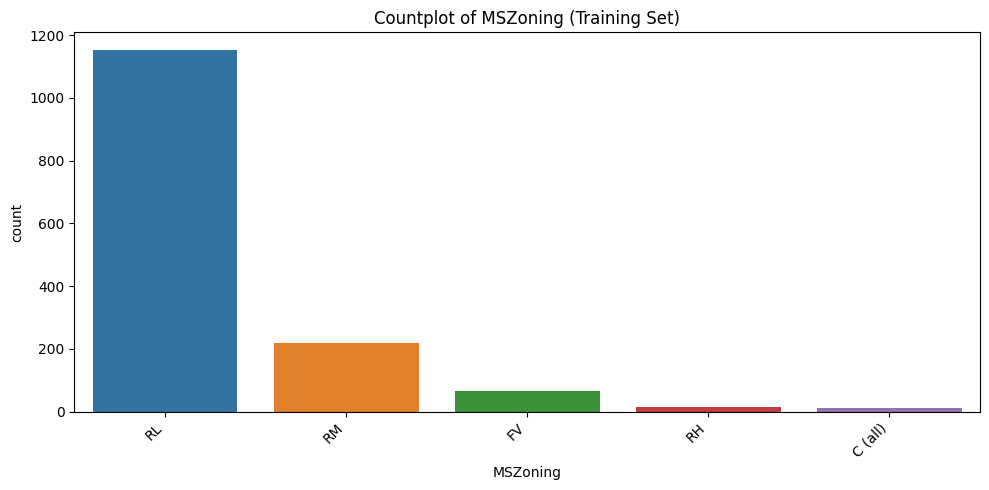

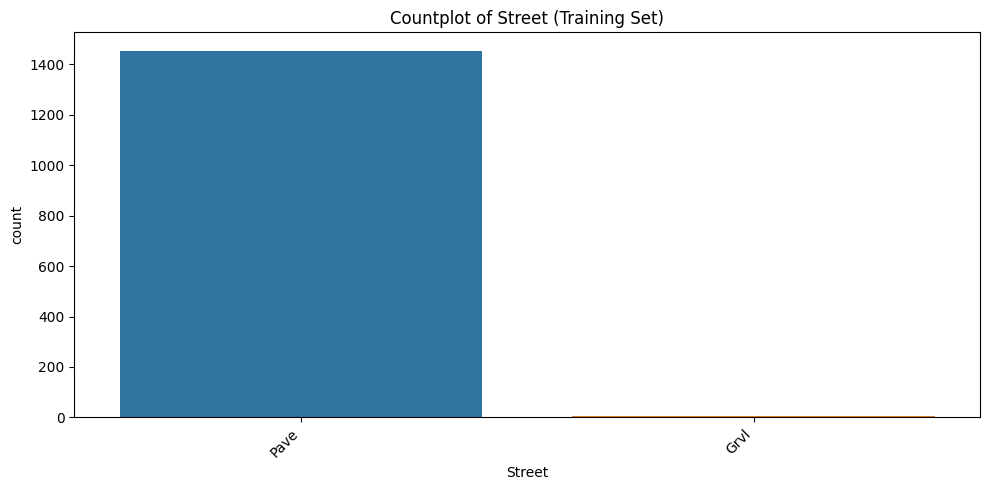

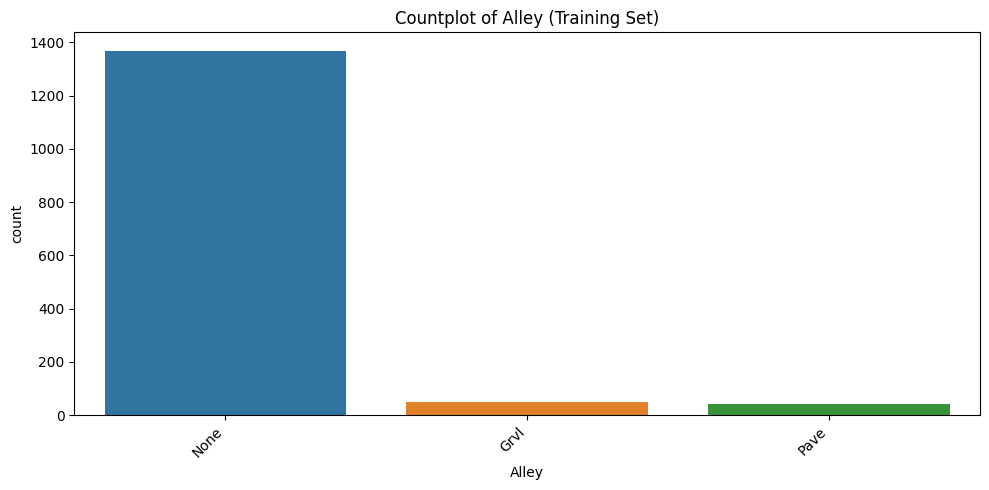

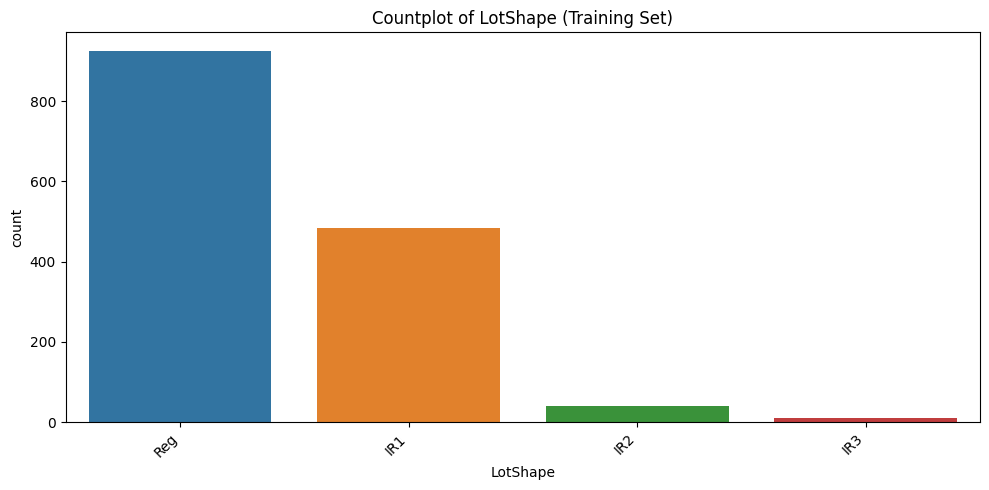

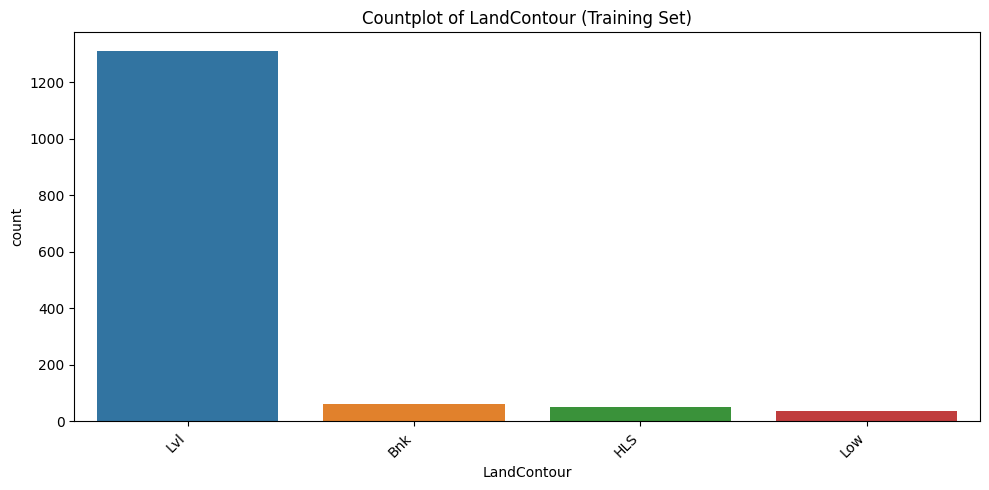

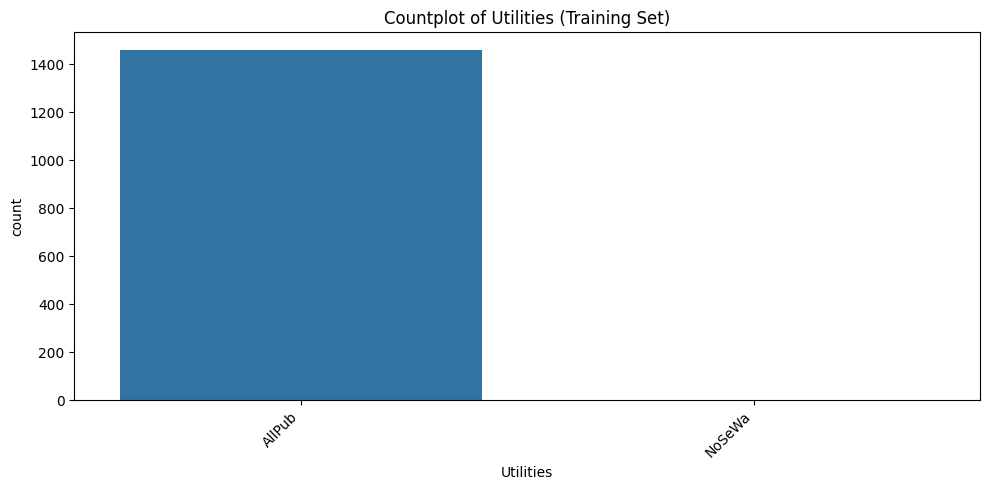

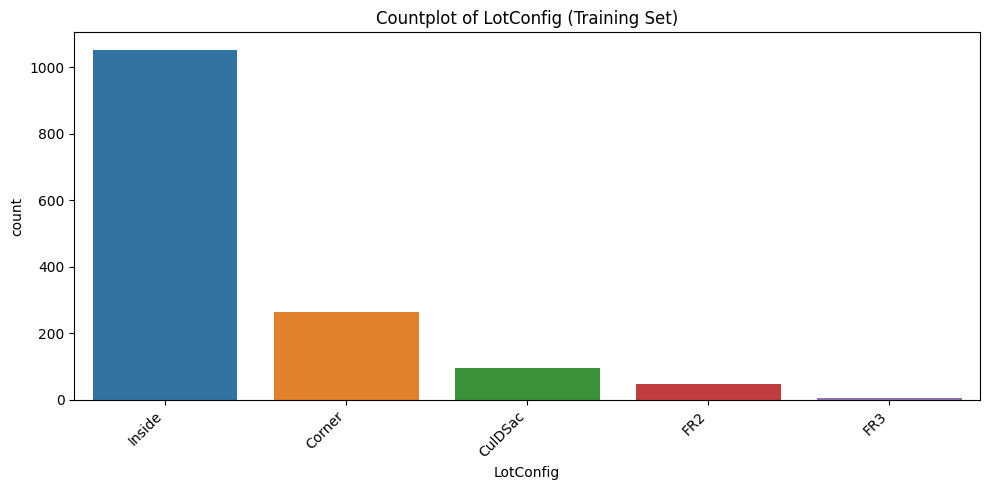

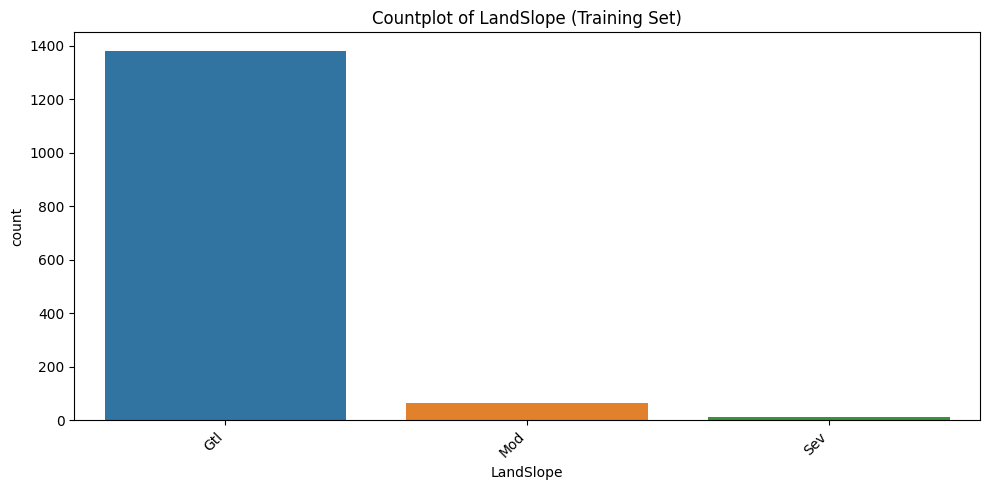

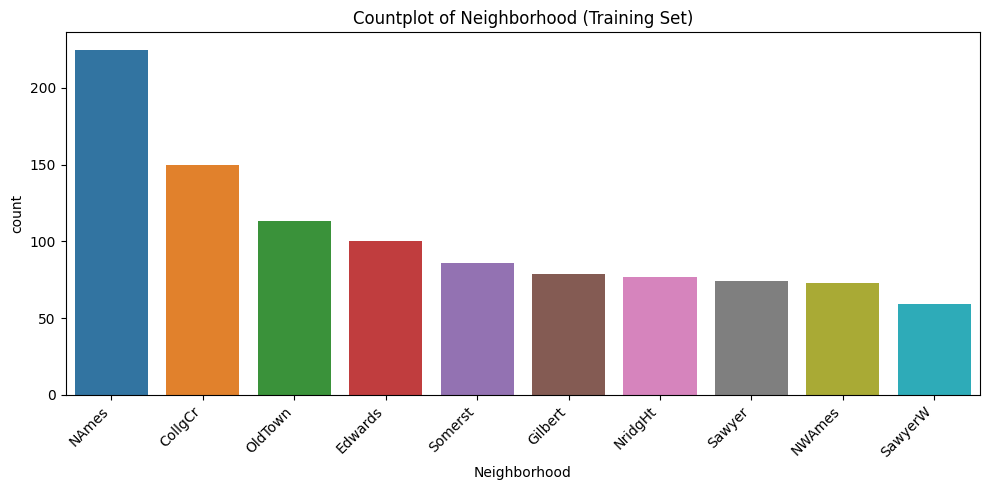

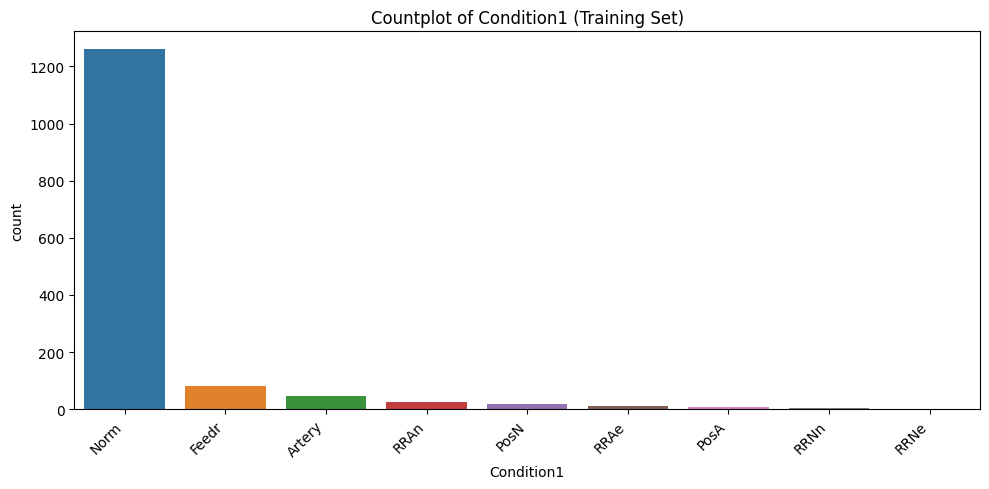

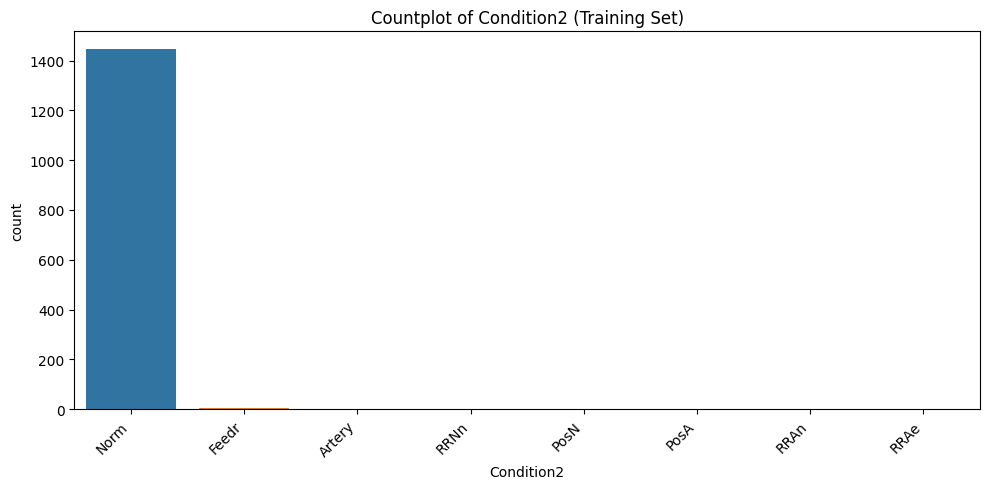

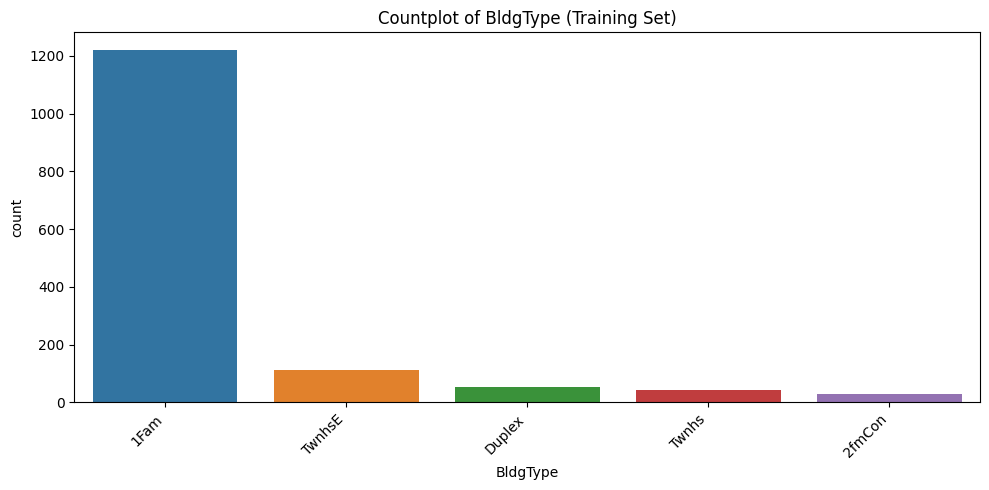

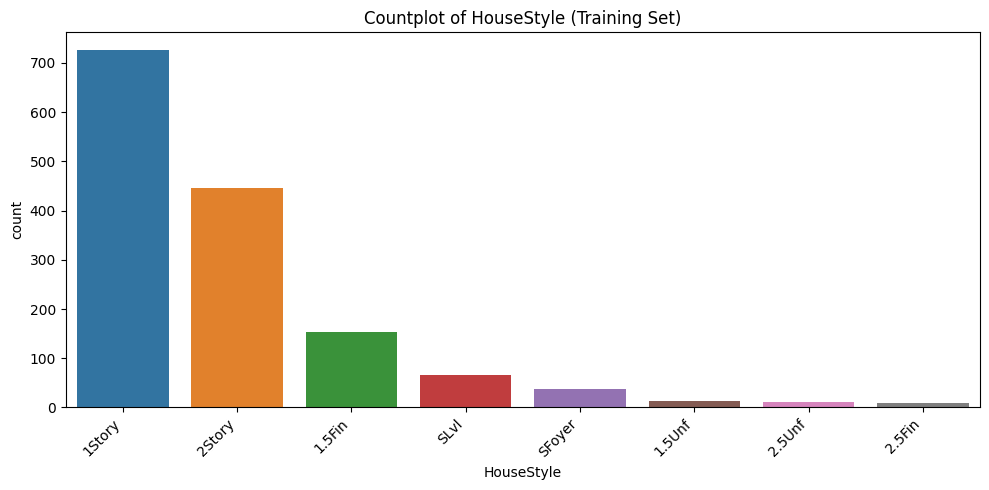

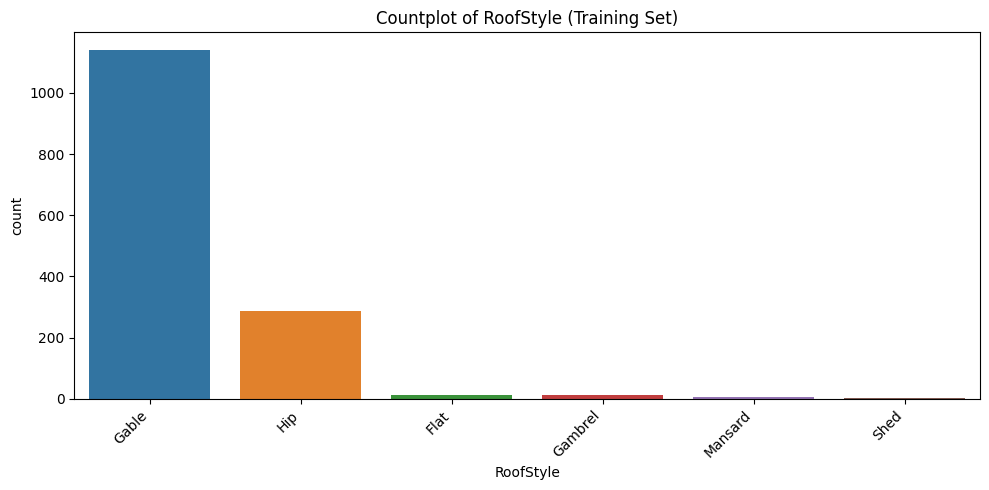

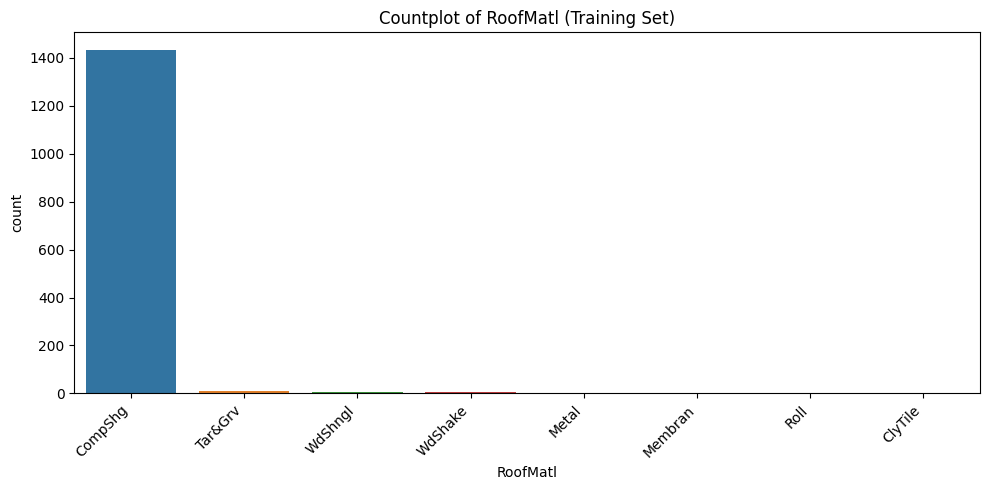

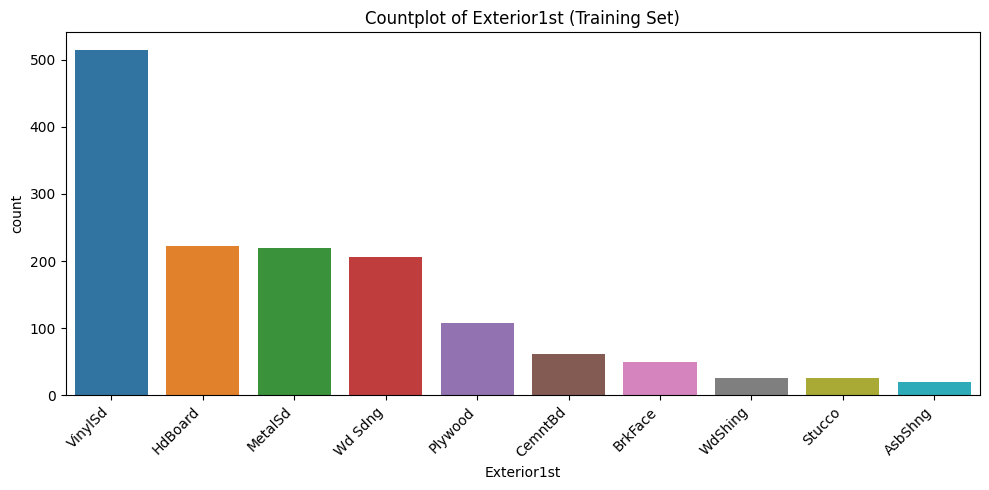

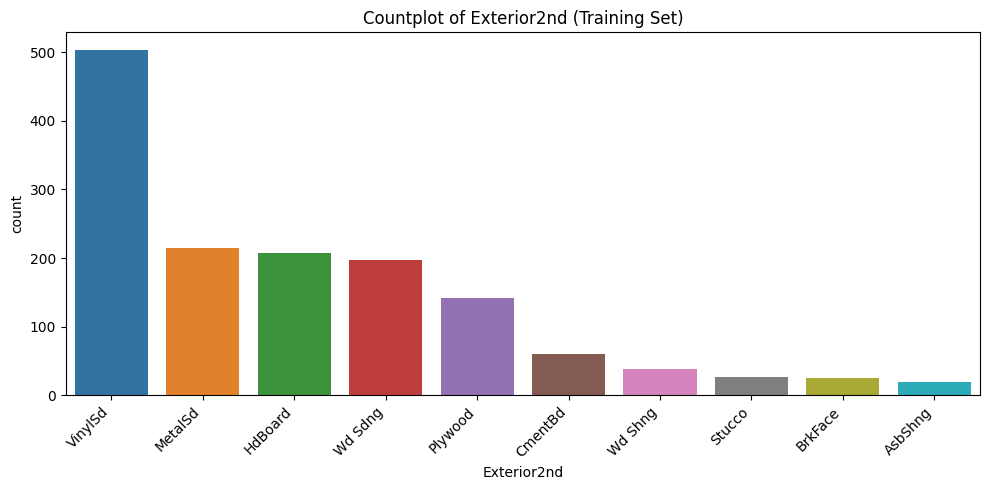

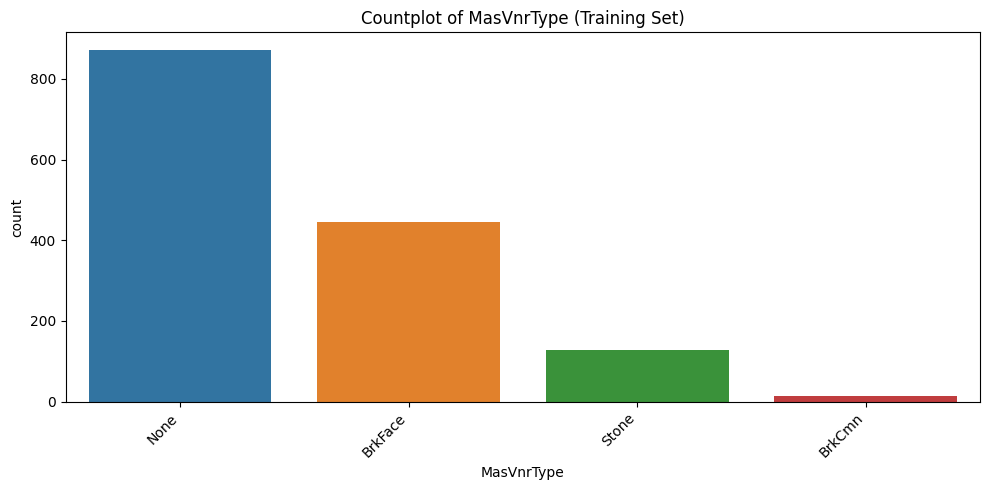

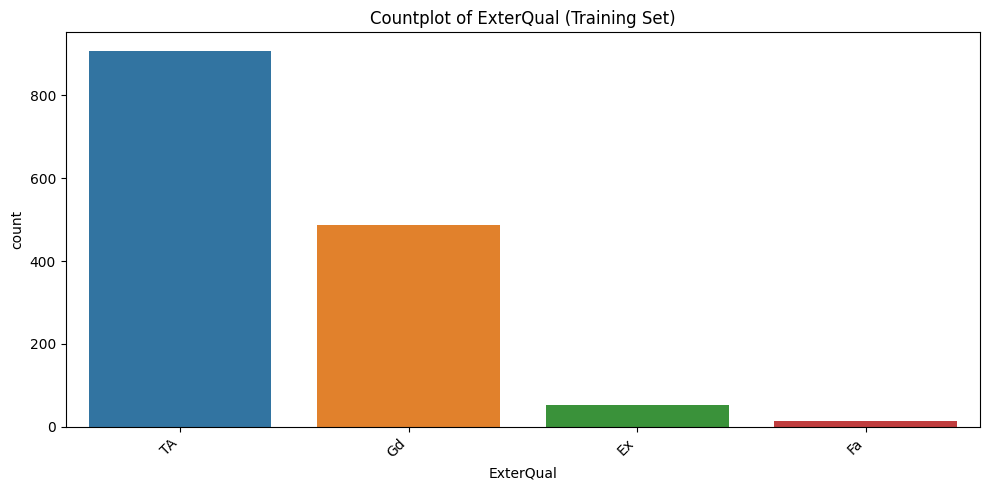

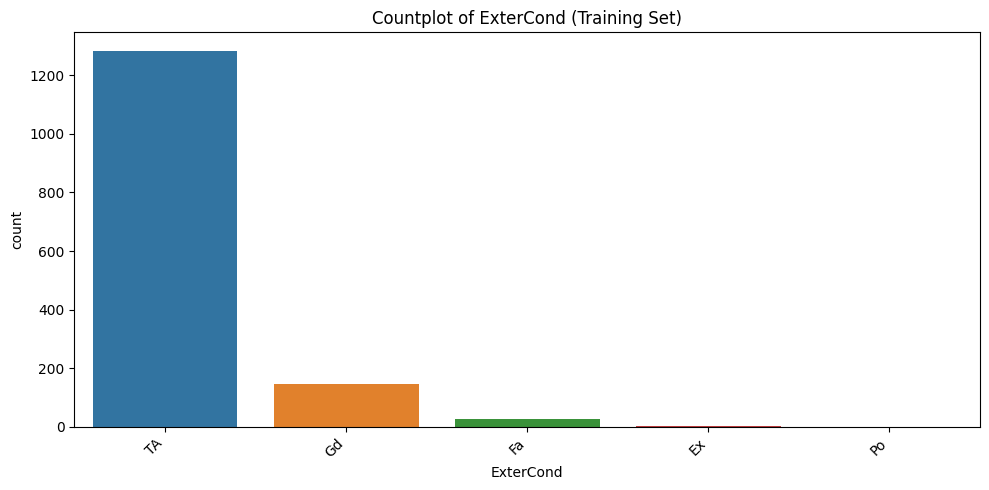

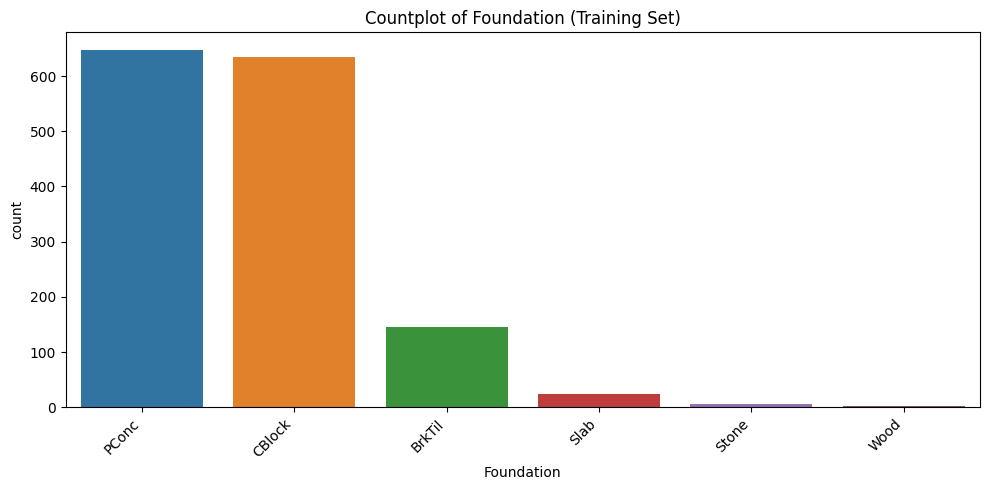

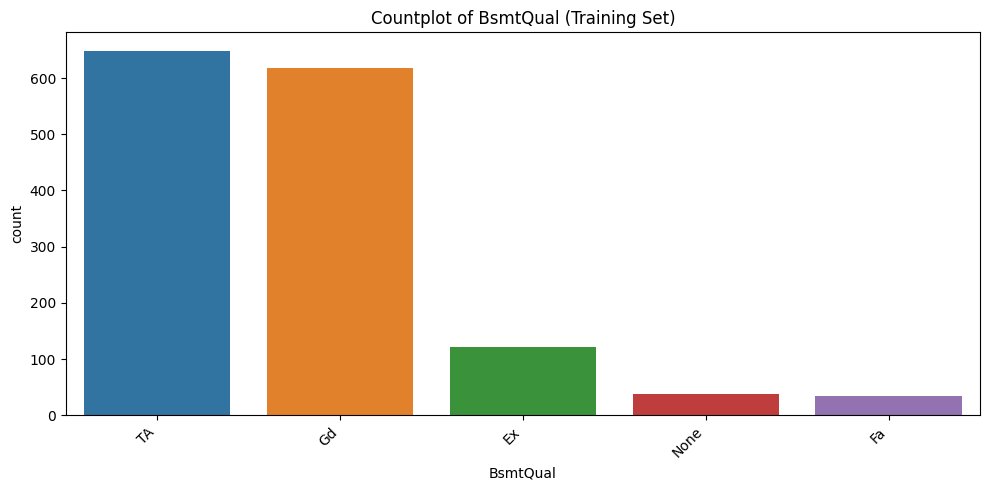

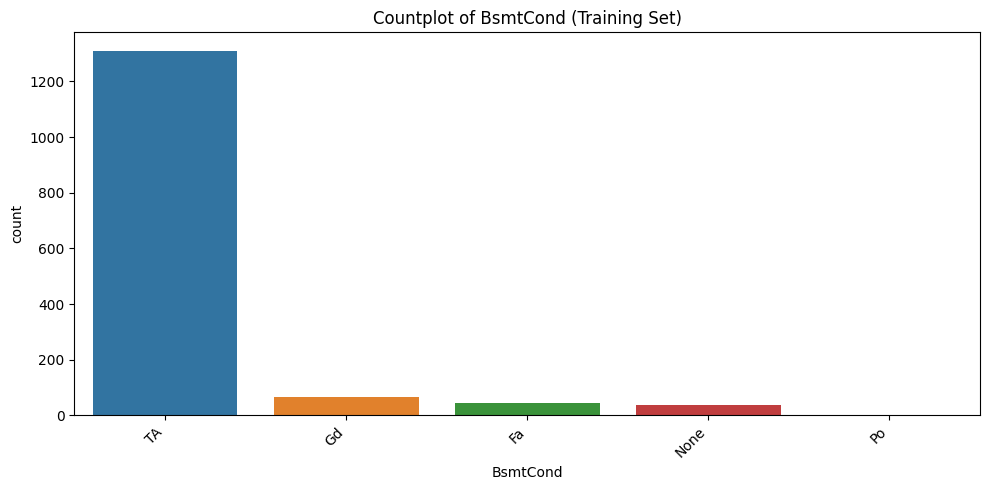

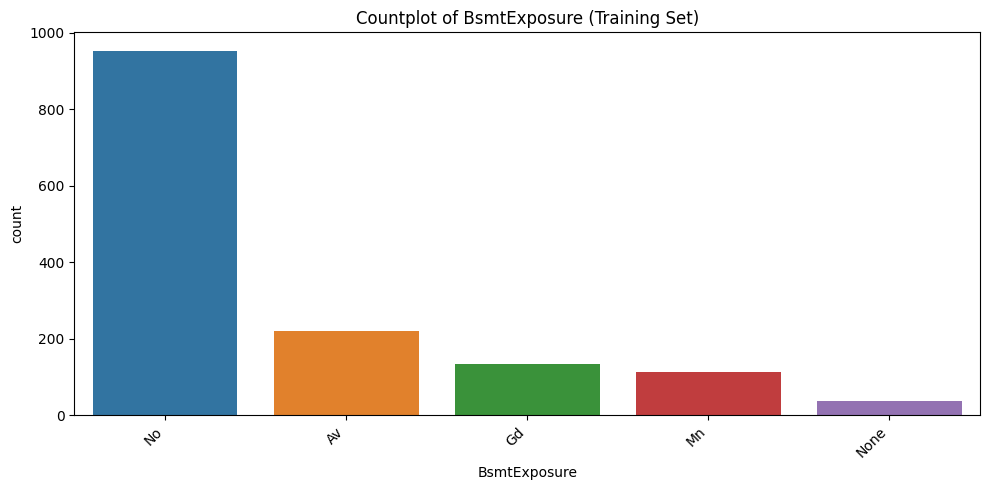

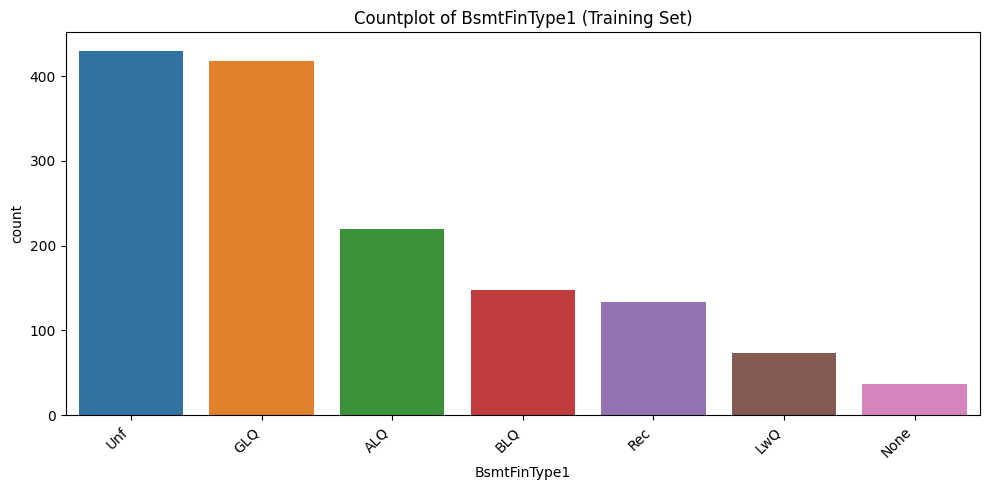

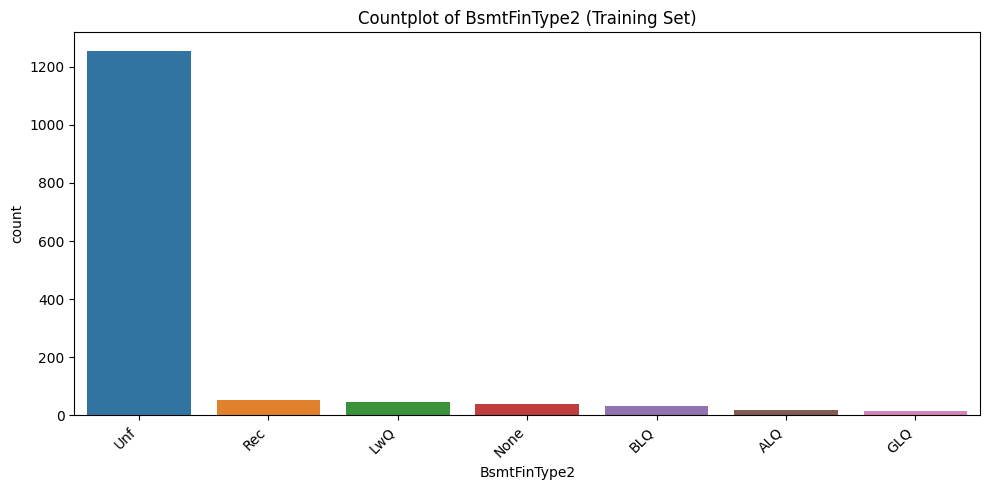

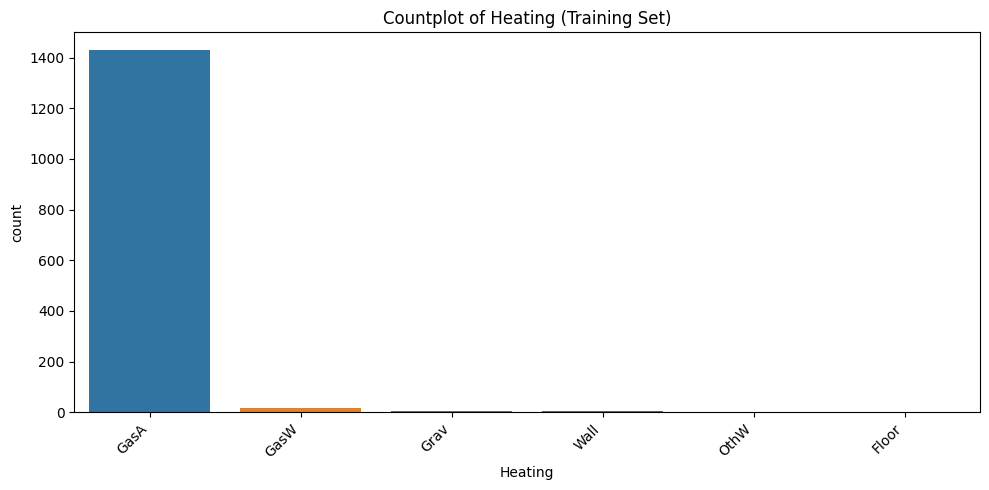

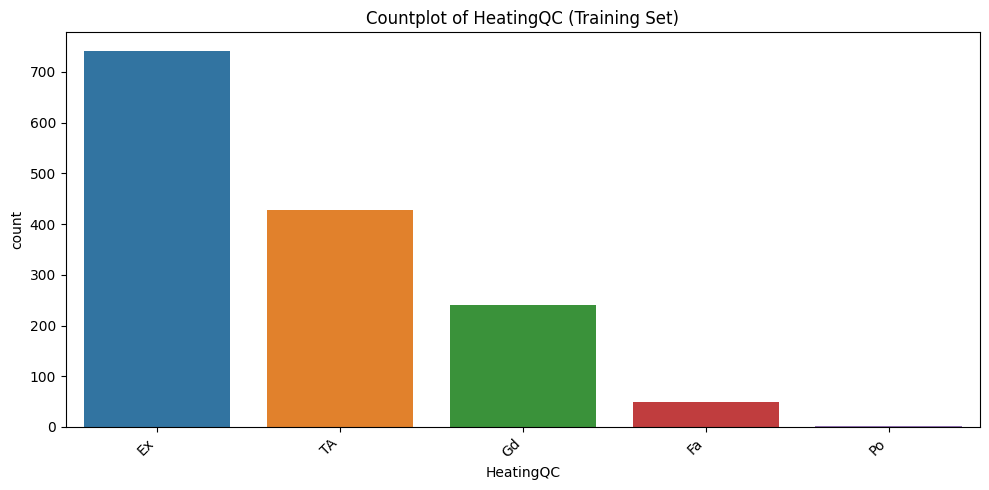

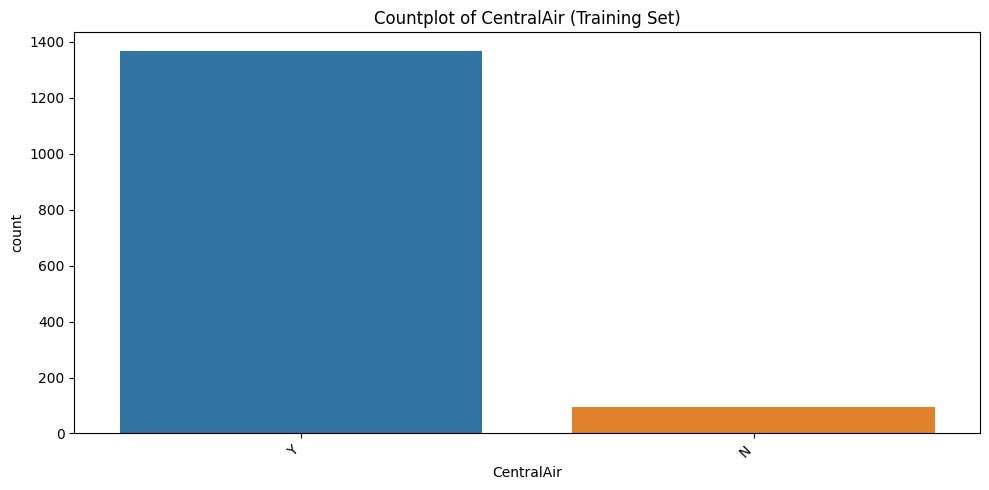

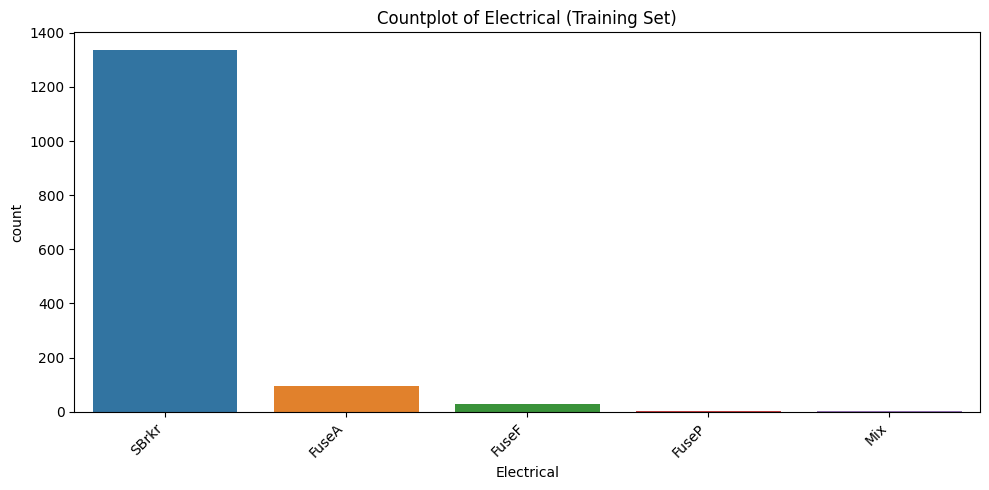

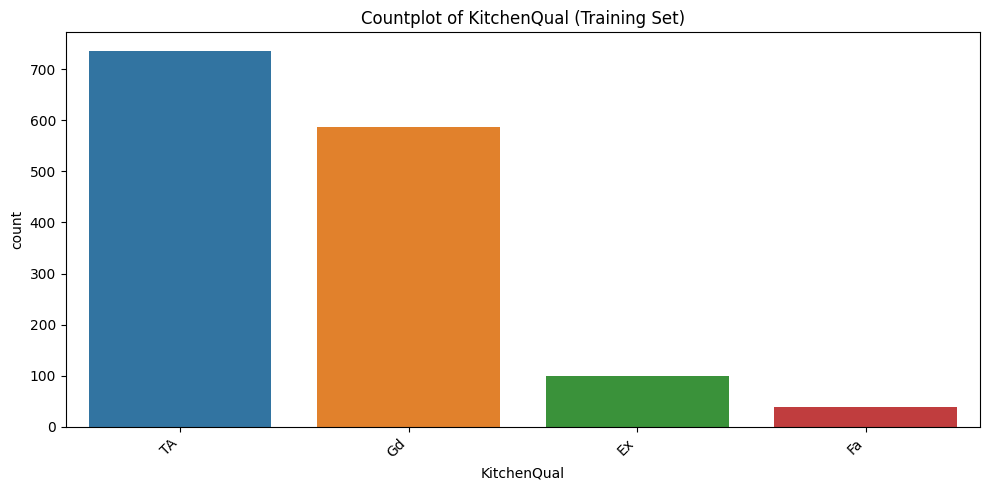

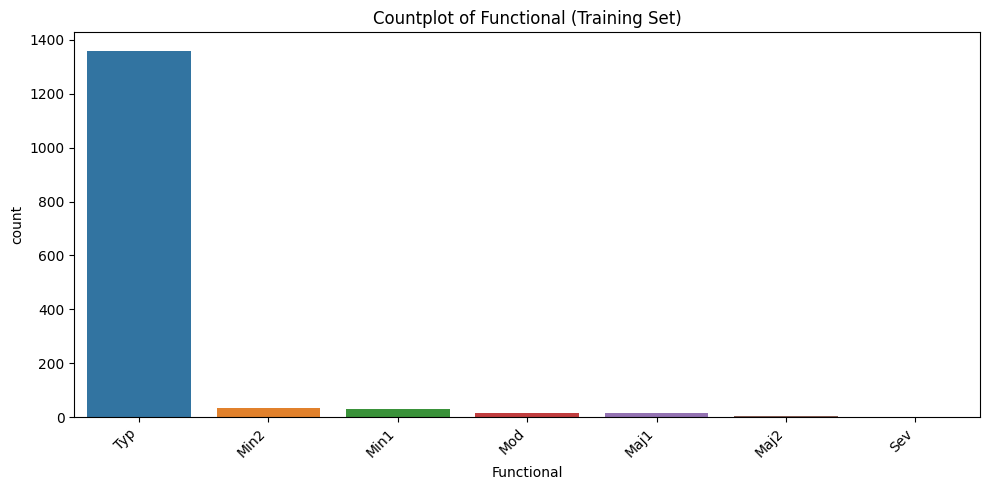

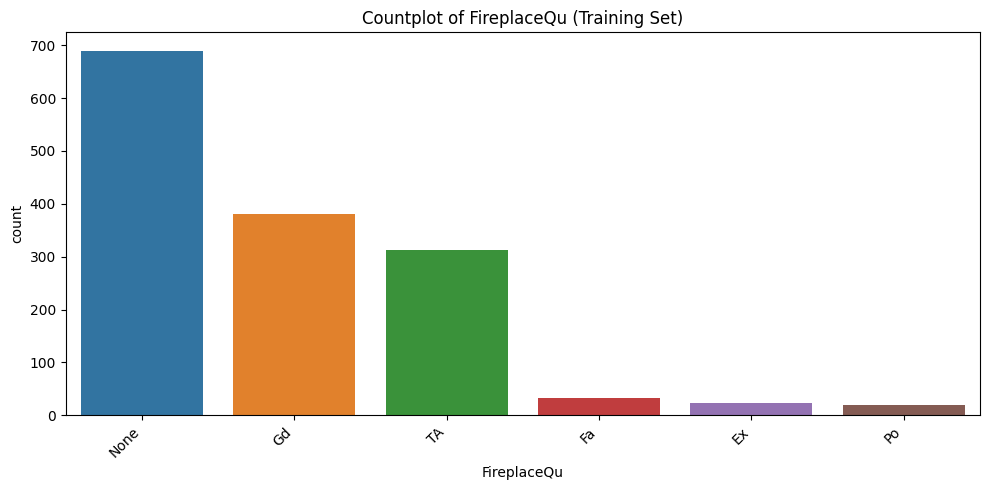

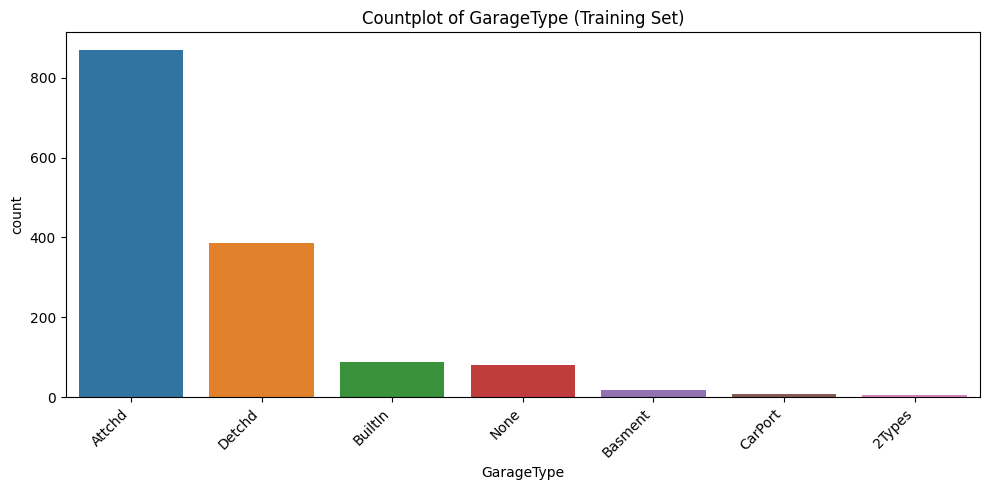

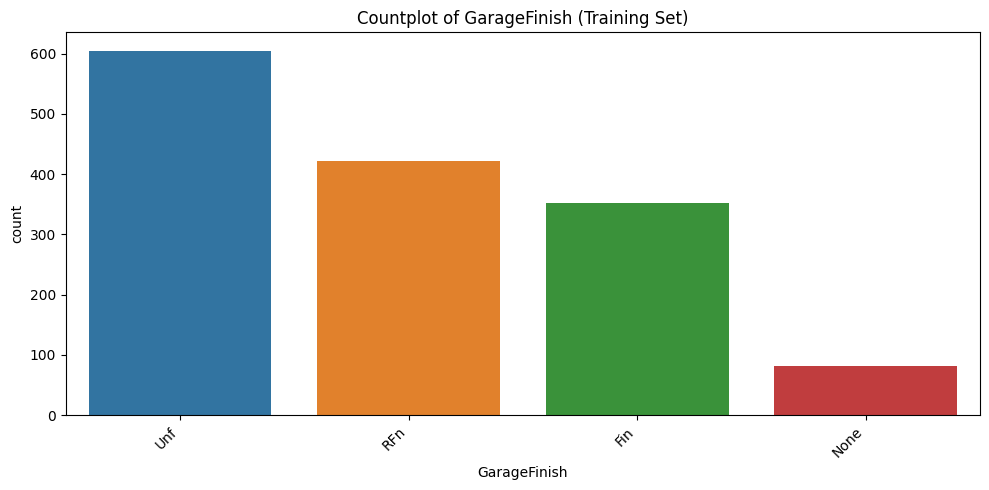

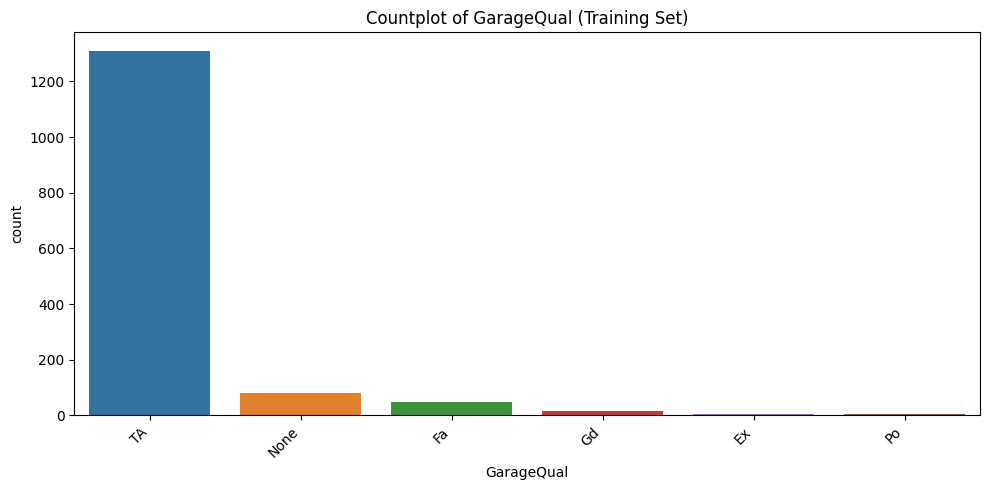

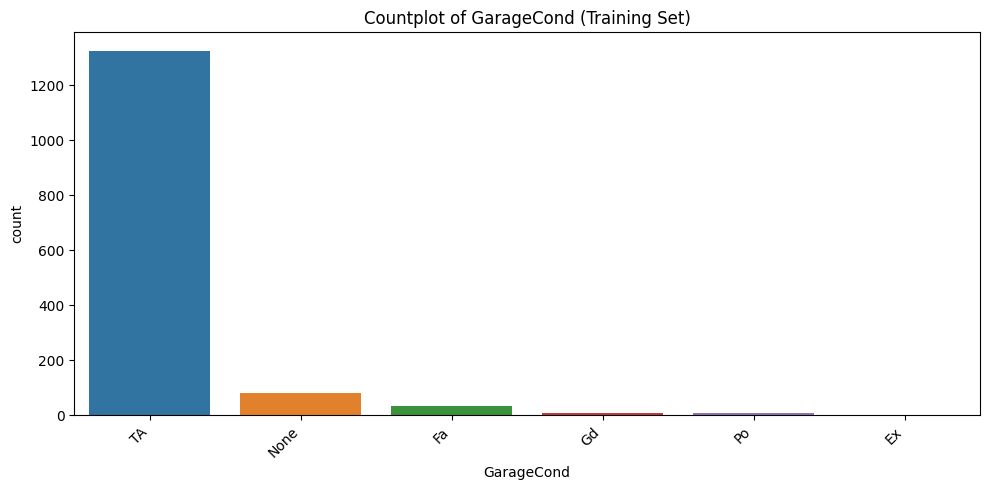

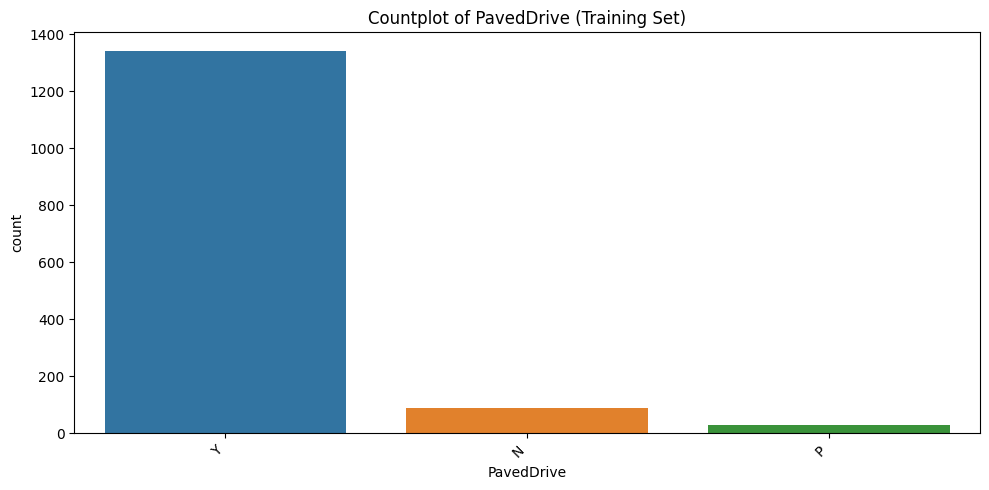

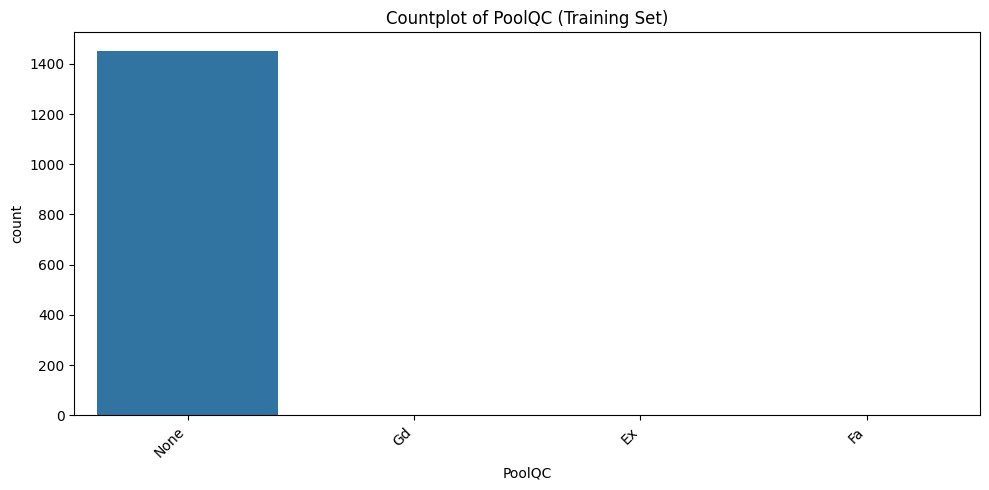

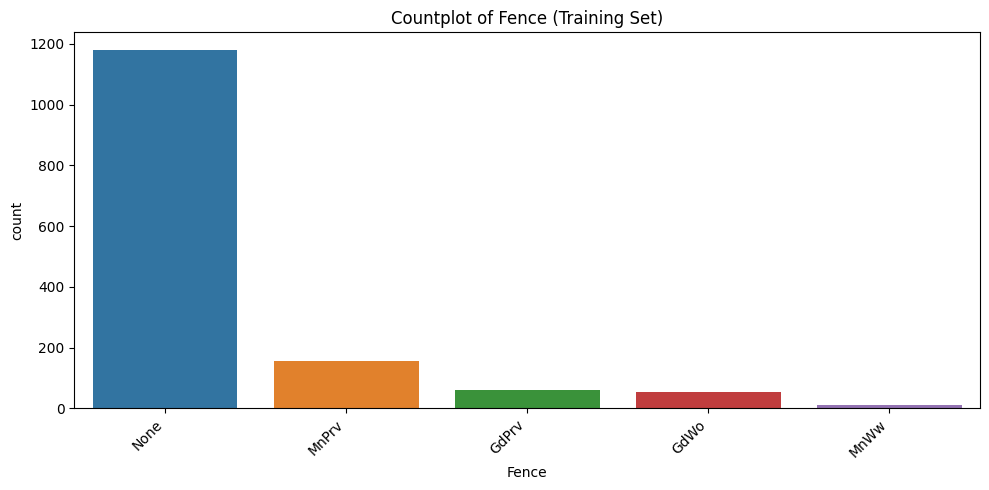

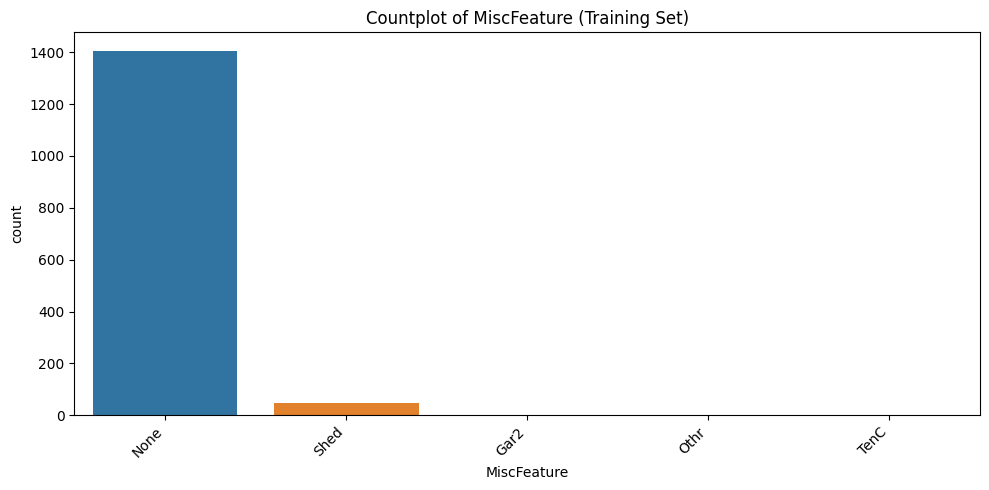

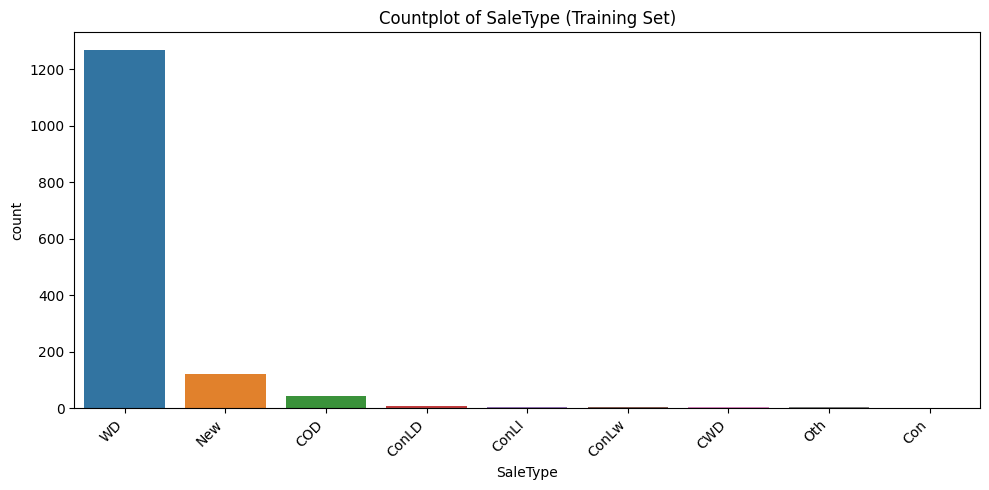

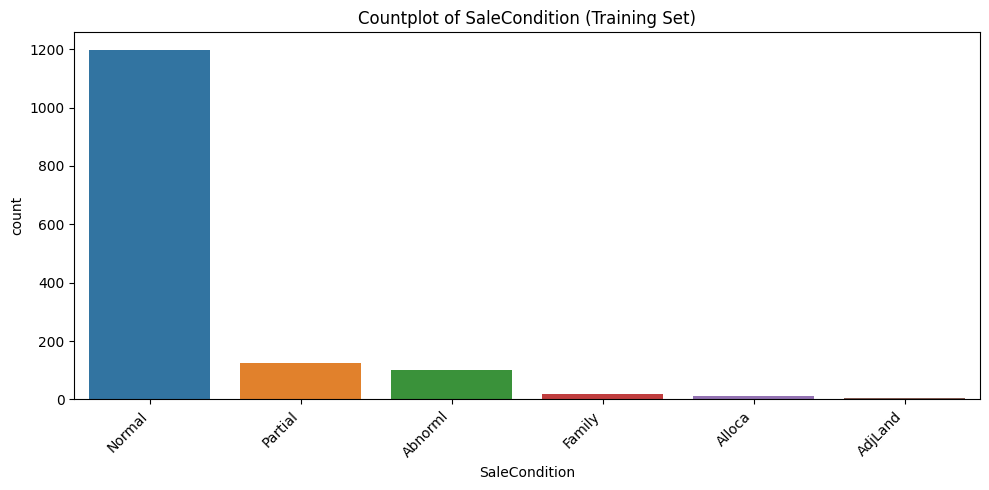

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns

# Function to visualize a dataframe
def visualize_dataframe(df, dataset_name="Dataset"):
    print(f"\nVisualizing: {dataset_name}")
    
    # Plot histograms for numerical columns
    numerical_cols = df.select_dtypes(include=['int64', 'float64']).columns.tolist()
    
    df[numerical_cols].hist(bins=30, figsize=(20, 15), edgecolor='black')
    plt.suptitle(f'Histograms of Numerical Columns ({dataset_name})', fontsize=20)
    plt.tight_layout()
    plt.show()
    
    # Plot countplots for categorical columns
    categorical_cols = df.select_dtypes(include=['object', 'category']).columns.tolist()
    
    for col in categorical_cols:
        plt.figure(figsize=(10, 5))
        # Limit x-axis to top 10 categories if too many unique values
        top_categories = df[col].value_counts().nlargest(10).index
        sns.countplot(data=df, x=col, order=top_categories)
        plt.xticks(rotation=45, ha='right')
        plt.title(f'Countplot of {col} ({dataset_name})')
        plt.tight_layout()
        plt.show()

# Example usage:
visualize_dataframe(df_train, "Training Set")
# visualize_dataframe(df_test, "Test Set")  # You can run this too!


In [15]:
# Convert all object columns to category dtype in train
for col in df_train.select_dtypes(include='object').columns:
    df_train[col] = df_train[col].astype('category')

# Do the same for test
for col in df_test.select_dtypes(include='object').columns:
    df_test[col] = df_test[col].astype('category')


In [39]:
from sklearn.model_selection import train_test_split
import xgboost as xgb
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np

# Define features and target
features = df_train.drop(columns=['SalePrice']).columns.tolist()
target = 'SalePrice'

# First split: train + temp (60% / 40%)
X_train, X_temp, y_train, y_temp = train_test_split(
    df_train[features], df_train[target],
    test_size=0.4, random_state=42
)

# Second split: validation + test (each 50% of temp → 20% each)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp,
    test_size=0.5, random_state=42
)

# Check split sizes
print(f"Training set: {X_train.shape[0]} samples")
print(f"Validation set: {X_val.shape[0]} samples")
print(f"Test set: {X_test.shape[0]} samples")

# Define XGBoost Regressor
model = xgb.XGBRegressor(
    n_estimators=400,
    learning_rate=0.1,
    max_depth=5,
    enable_categorical=True,
    random_state=42
)

# Train on training set
model.fit(X_train, y_train)

# Predict on validation set
y_val_pred = model.predict(X_val)

# Evaluate on validation set
rmse_val = np.sqrt(mean_squared_error(y_val, y_val_pred))
r2_val = r2_score(y_val, y_val_pred)

# Predict on test set
y_test_pred = model.predict(X_test)

# Evaluate on test set
rmse_test = np.sqrt(mean_squared_error(y_test, y_test_pred))
r2_test = r2_score(y_test, y_test_pred)

# Print results
print(f"\nValidation RMSE: {rmse_val:.2f}")
print(f"Validation R² Score: {r2_val:.4f}")

print(f"\nTest RMSE: {rmse_test:.2f}")
print(f"Test R² Score: {r2_test:.4f}")


Training set: 876 samples
Validation set: 292 samples
Test set: 292 samples

Validation RMSE: 35859.42
Validation R² Score: 0.8635

Test RMSE: 20874.80
Test R² Score: 0.9109


In [25]:
from sklearn.model_selection import RandomizedSearchCV

# Use same param_grid
random_search = RandomizedSearchCV(
    estimator=xgb.XGBRegressor(enable_categorical=True, random_state=42),
    param_distributions=param_grid,
    n_iter=25,   # Try 25 random combinations → MUCH faster
    cv=5,
    scoring='neg_root_mean_squared_error',
    verbose=2,
    n_jobs=-1
)

random_search.fit(X_train, y_train)


Fitting 5 folds for each of 25 candidates, totalling 125 fits


RandomizedSearchCV(cv=5,
                   estimator=XGBRegressor(base_score=None, booster=None,
                                          callbacks=None,
                                          colsample_bylevel=None,
                                          colsample_bynode=None,
                                          colsample_bytree=None, device=None,
                                          early_stopping_rounds=None,
                                          enable_categorical=True,
                                          eval_metric=None, feature_types=None,
                                          gamma=None, grow_policy=None,
                                          importance_type=None,
                                          interaction_constraints=None,
                                          learning_rate=N...
                                          monotone_constraints=None,
                                          multi_strategy=None,
                                          n_estimators=None, n_jobs=None,
                                          num_parallel_tree=None,
                                          random_state=42, ...),
                   n_iter=25, n_jobs=-1,
                   param_distributions={'colsample_bytree': [0.7, 0.8, 1.0],
                                        'learning_rate': [0.01, 0.03, 0.05,
                                                          0.1],
                                        'max_depth': [3, 4, 5, 6],
                                        'n_estimators': [300, 500, 700],
                                        'subsample': [0.7, 0.8, 1.0]},
                   scoring='neg_root_mean_squared_error', verbose=2)

In [27]:
print("Best parameters:", random_search.best_params_)


Best parameters: {'subsample': 0.8, 'n_estimators': 500, 'max_depth': 4, 'learning_rate': 0.1, 'colsample_bytree': 0.7}


In [41]:
# Drop 'Id' column for model input if needed:
X_submission = df_test[features]  # Same features used in training!
# Predict on your external test set
submission_preds = model.predict(X_submission)

# Create submission DataFrame
submission_df = pd.DataFrame({
    'Id': df_test['Id'],
    'SalePrice': submission_preds
})

# Save submission
submission_df.to_csv('submission.csv', index=False)
print("Submission file saved as 'submission.csv'")


Submission file saved as 'submission.csv'
